# Discovery (identificazione del problema e degli obiettivi)

# Data selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from matplotlib.ticker import FuncFormatter
sns.set(style='whitegrid')
%matplotlib inline
import time

In [3]:
df1=pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\PROGETTO\test.csv",index_col=0)
df2=pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\PROGETTO\train.csv",index_col=0)
df=pd.concat([df1,df2]).reset_index(drop=True)

In [4]:
df.sample(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
54086,14027,Female,disloyal Customer,13,Business travel,Eco,1117,5,5,5,...,3,2,3,2,2,3,3,0,3.0,satisfied
7758,56553,Male,Loyal Customer,44,Business travel,Business,2431,4,4,4,...,2,2,2,2,3,2,4,0,1.0,satisfied
65197,24379,Male,Loyal Customer,38,Business travel,Business,669,1,1,1,...,5,5,5,5,5,5,4,0,6.0,satisfied
123021,7268,Male,Loyal Customer,69,Personal Travel,Eco,116,2,1,2,...,2,4,1,2,2,3,2,46,30.0,neutral or dissatisfied
76431,111250,Female,Loyal Customer,41,Business travel,Business,1788,3,3,5,...,5,5,5,5,5,5,4,0,0.0,satisfied
41315,86696,Male,Loyal Customer,45,Business travel,Business,1747,3,3,3,...,4,4,5,4,3,4,4,0,0.0,satisfied
2032,14702,Male,Loyal Customer,38,Business travel,Eco,419,3,4,3,...,3,2,2,3,4,4,3,1,0.0,neutral or dissatisfied
124373,39660,Male,disloyal Customer,23,Business travel,Business,224,0,0,0,...,1,2,5,2,3,4,1,10,13.0,satisfied
34541,3095,Male,Loyal Customer,51,Personal Travel,Eco,678,2,4,2,...,4,3,5,5,3,4,4,19,22.0,neutral or dissatisfied
48864,76573,Male,Loyal Customer,25,Business travel,Eco,547,1,1,5,...,1,1,4,3,2,3,1,44,39.0,neutral or dissatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

# Data cleaning

In [6]:
arrivo=df[df['Arrival Delay in Minutes'].notna()]['Arrival Delay in Minutes']

In [7]:
partenza=df[df['Arrival Delay in Minutes'].notna()]['Departure Delay in Minutes']

In [8]:
gap=(arrivo - partenza)

In [9]:
round(gap[gap>0].mean())

11

In [10]:
round(gap[gap<0].mean())

-8

In [11]:
#sostituisco i valori nulli degli arrivi con quelli della partenza nello stesso indice e aggiungo un valore random da -8 a +11
#trasformo da float a int
for x in df[df['Arrival Delay in Minutes'].isnull()].index:
    df['Arrival Delay in Minutes'].loc[x] = df['Departure Delay in Minutes'].loc[x]+(rnd.randint(-8,11))
    if df['Arrival Delay in Minutes'].loc[x]<0:
        df['Arrival Delay in Minutes'].loc[x]=0
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].astype('Int64')

C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'].loc[x] = df['Departure Delay in Minutes'].loc[x]+(rnd.randint(-8,11))
C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'].loc[x] = df['Departure Delay in Minutes'].loc[x]+(rnd.randint(-8,11))
C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'].loc[x] = df['Departure Delay in Minutes'].loc[x]+(rnd.randint(-8,11))
C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Delay in Minutes'].loc[x] = df['Departure Delay in Minutes'].loc[x]+(rnd.randint(-8,11))
C:\Users\aless\AppData\Local\Temp\ipykernel_7648\3012723896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [12]:
#controllo se ci sono righe del dataframe duplicate o id duplicati
print(f'id duplicati: {df.id.duplicated().sum()}\nrighe df duplcate: {df.duplicated().sum()}')

id duplicati: 0
righe df duplcate: 0


In [13]:
df['Customer Type'] = df['Customer Type'].str.replace('disloyal', 'Disloyal')

In [13]:
#salvo il csv nel computer per Power BI
df.to_csv(r'C:\\Users\\aless\\OneDrive\\Desktop\\PROGETTO\\recensioni_aereo.csv',index=False)

# Data exploration and visualisation

# ANALISI UNIVARIATA

In [15]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.0
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.166754
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.602191
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.0
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.0
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.0
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.0


In [16]:
round((df.Gender.value_counts()*100)/len(df),2)

Gender
Female    50.74
Male      49.26
Name: count, dtype: float64

In [17]:
round((df.satisfaction.value_counts()*100)/len(df),2)

satisfaction
neutral or dissatisfied    56.55
satisfied                  43.45
Name: count, dtype: float64

In [18]:
print(df['Customer Type'].value_counts())
print('\n',df['Type of Travel'].value_counts())
print('\n',round(df['Type of Travel'].value_counts()*100/len(df)))
print('\n',df['Class'].value_counts())

Customer Type
Loyal Customer       106100
Disloyal Customer     23780
Name: count, dtype: int64

 Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

 Type of Travel
Business travel    69.0
Personal Travel    31.0
Name: count, dtype: float64

 Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


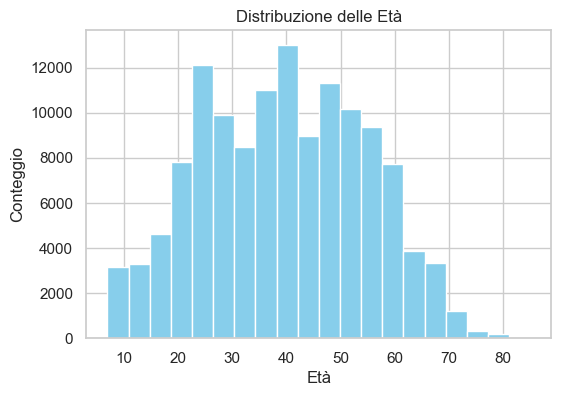

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(df.Age,color='skyblue',bins=20)
plt.title('Distribuzione delle Età')
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.show()

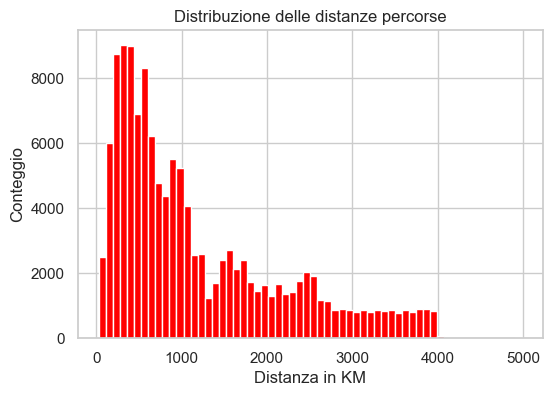

In [20]:
plt.figure(figsize=(6, 4))
plt.hist(df['Flight Distance'],bins=60,color='red')
plt.title('Distribuzione delle distanze percorse')
plt.xlabel('Distanza in KM')
plt.ylabel('Conteggio')
plt.show()

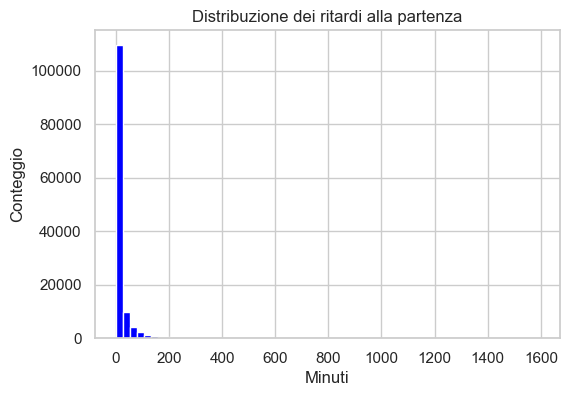

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(df['Departure Delay in Minutes'],color='blue',bins=60)
plt.title('Distribuzione dei ritardi alla partenza')
plt.xlabel('Minuti')
plt.ylabel('Conteggio')
plt.show()

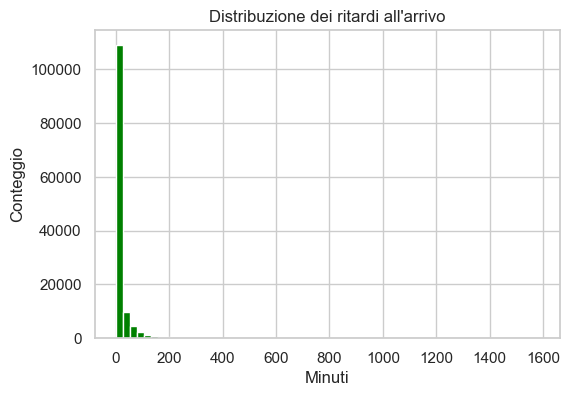

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df['Arrival Delay in Minutes'].dropna(),color='green',bins=60)
plt.title("Distribuzione dei ritardi all'arrivo")
plt.xlabel('Minuti')
plt.ylabel('Conteggio')
plt.show()

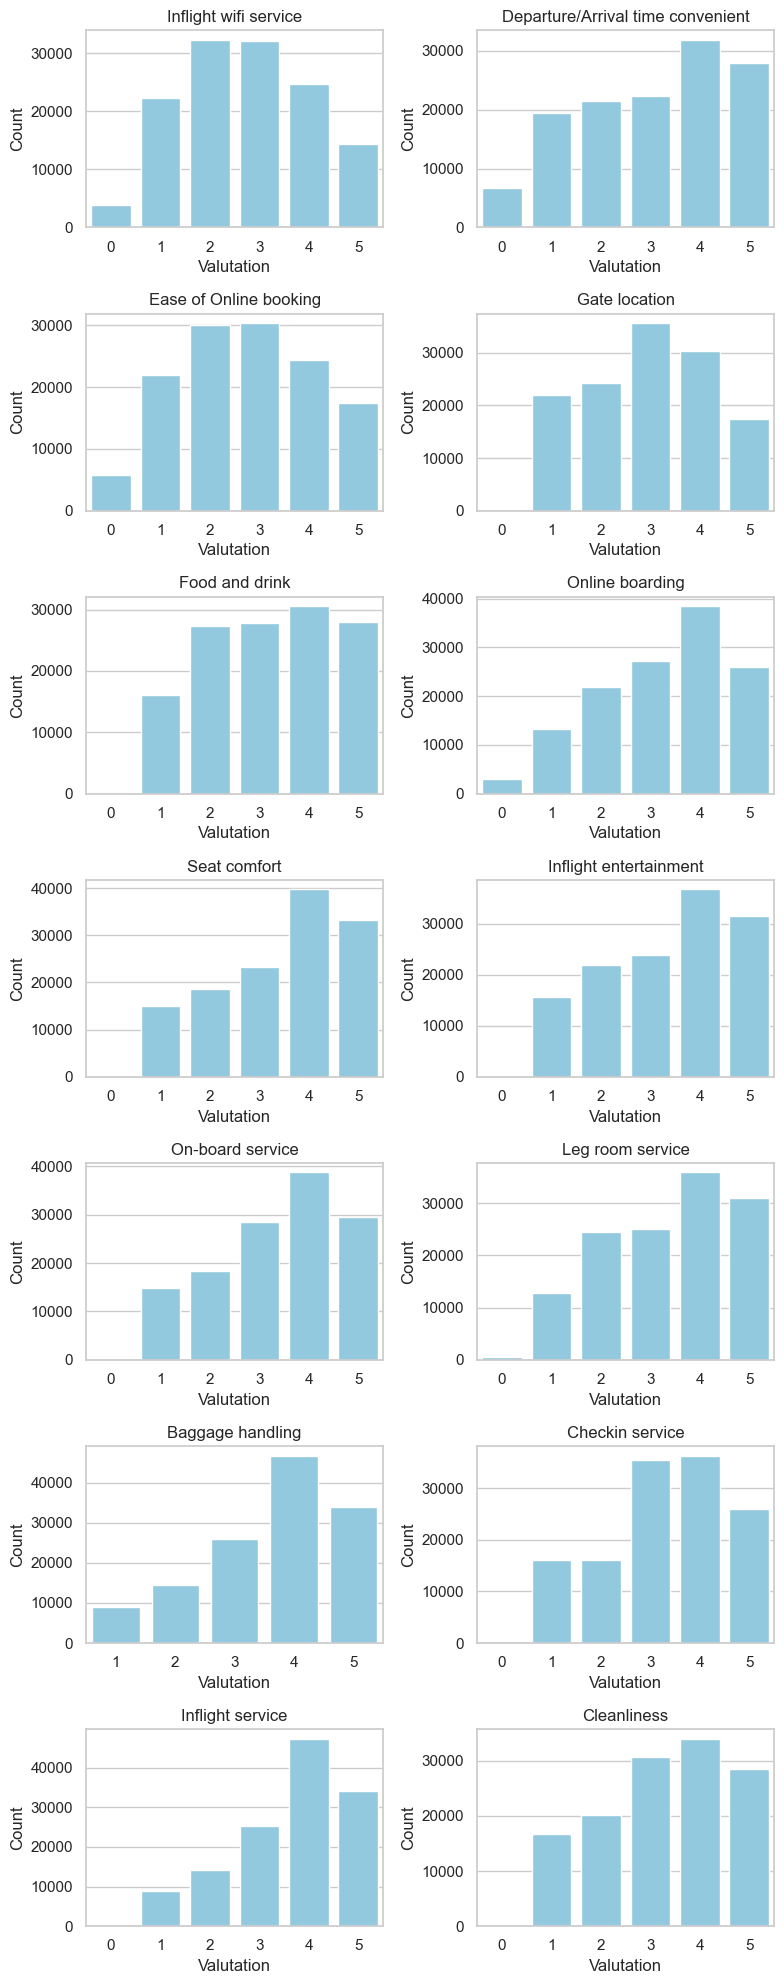

In [23]:
# Creazione del subplot a barre per le 14 colonne
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 20)) 
columns = df.columns[7:21]
# Creazione dei subplot
for i, ax in enumerate(axes.flatten()):
     if i < len(columns):
        sns.barplot(y=df[columns[i]].value_counts(),x=df[columns[i]].value_counts().index,color='skyblue',ax=ax)
        ax.set_title(columns[i])
        ax.set_xlabel('Valutation')
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Data trasformation and visualisations

# ANALISI BIVARIATA

In [24]:
classi_mean=pd.DataFrame({'Business':df[df['Class']=='Business'].describe().iloc[1,3:17]})
classi_mean['Eco']=df[df['Class']=='Eco'].describe().iloc[1,3:17].values
classi_mean['Eco Plus']=df[df['Class']=='Eco Plus'].describe().iloc[1,3:17].values
classi_mean['Total']=df.describe().iloc[1,3:17].values

classi_mean=classi_mean.round(1)
classi_mean


,Business,Eco,Eco Plus,Total
Inflight wifi service,2.8,2.7,2.8,2.7
Departure/Arrival time convenient,2.9,3.2,3.2,3.1
Ease of Online booking,2.9,2.6,2.7,2.8
Gate location,3.0,3.0,3.0,3.0
Food and drink,3.3,3.1,3.1,3.2
Online boarding,3.7,2.8,2.9,3.3
Seat comfort,3.8,3.1,3.2,3.4
Inflight entertainment,3.6,3.1,3.1,3.4
On-board service,3.7,3.1,3.0,3.4
Leg room service,3.6,3.1,3.1,3.4


In [25]:
df[df['Customer Type']=='Loyal Customer'].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.000000,106100.0
mean,64914.468209,41.462008,1297.046437,2.732319,3.207125,2.768860,2.974222,3.240660,3.373544,3.538944,3.425024,3.416032,3.380066,3.618219,3.324995,3.629218,3.336890,14.644156,15.085778
std,37473.115964,15.138065,1048.719375,1.334351,1.472693,1.415511,1.309899,1.314132,1.323869,1.278370,1.312947,1.287175,1.313759,1.198757,1.261289,1.191775,1.291113,38.201536,38.707947
min,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,32483.250000,31.000000,440.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.0
50%,64998.500000,43.000000,925.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.0
75%,97324.250000,53.000000,1986.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.0
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.0


In [26]:
df[df['Customer Type']=='disloyal Customer'].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


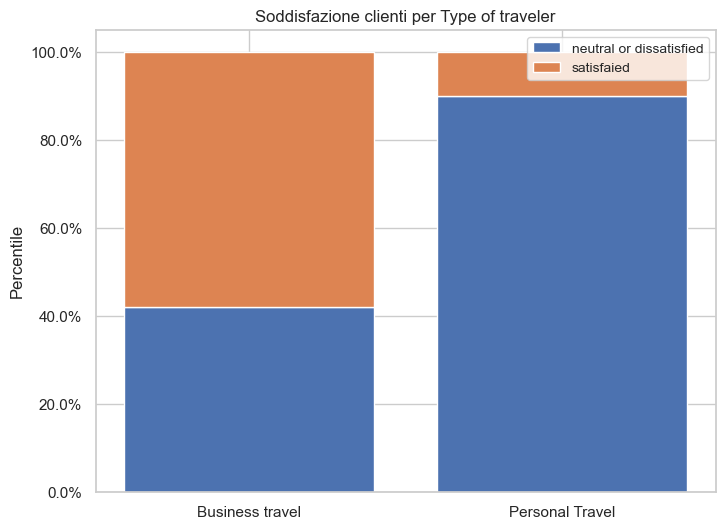

In [27]:
pers_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Type of Travel']=='Personal Travel')])*100/len(df[(df['Type of Travel']=='Personal Travel')])
pers_sat=len(df[(df['satisfaction']=='satisfied')&(df['Type of Travel']=='Personal Travel')])*100/len(df[(df['Type of Travel']=='Personal Travel')])
buss_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Type of Travel']=='Business travel')])*100/len(df[(df['Type of Travel']=='Business travel')])
buss_sat=len(df[(df['satisfaction']=='satisfied')&(df['Type of Travel']=='Business travel')])*100/len(df[(df['Type of Travel']=='Business travel')])
sat=[round(buss_sat,0),round(pers_sat,0)]
disat=[round(buss_disat,0),round(pers_disat,0)]
fig, ax = plt.subplots(figsize=(8, 6))
barra1=ax.bar(df['Type of Travel'].unique(), disat, label='neutral or dissatisfied')
barra2=ax.bar(df['Type of Travel'].unique(), sat, bottom=disat, label='satisfaied')

ax.set_ylabel('Percentile')
ax.set_title('Soddisfazione clienti per Type of traveler')
ax.legend(loc="upper right",fontsize='small')
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

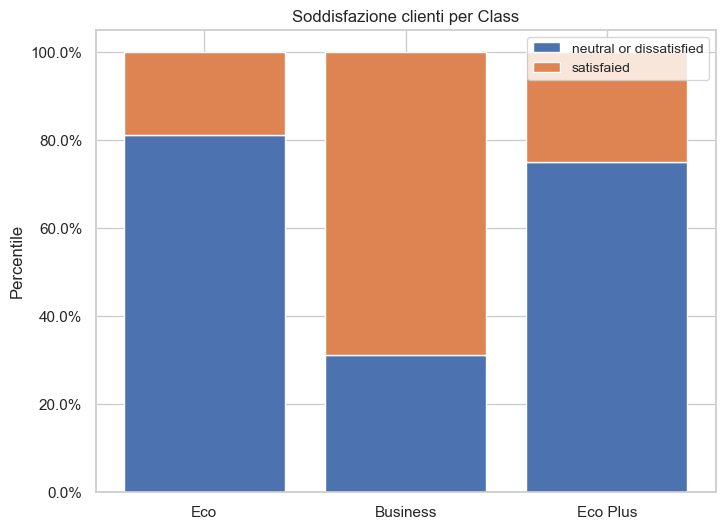

In [28]:
buss_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Class']=='Business')])*100/len(df[(df['Class']=='Business')])
buss_sat=len(df[(df['satisfaction']=='satisfied')&(df['Class']=='Business')])*100/len(df[(df['Class']=='Business')])
eco_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Class']=='Eco')])*100/len(df[(df['Class']=='Eco')])
eco_sat=len(df[(df['satisfaction']=='satisfied')&(df['Class']=='Eco')])*100/len(df[(df['Class']=='Eco')])
ecopl_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Class']=='Eco Plus')])*100/len(df[(df['Class']=='Eco Plus')])
ecopl_sat=len(df[(df['satisfaction']=='satisfied')&(df['Class']=='Eco Plus')])*100/len(df[(df['Class']=='Eco Plus')])
disat=[round(eco_disat,0),round(buss_disat,0),round(ecopl_disat,0)]
sat=[round(eco_sat,0),round(buss_sat,0),round(ecopl_sat,0)]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df['Class'].unique(), disat, label='neutral or dissatisfied')
ax.bar(df['Class'].unique(), sat, bottom=disat, label='satisfaied')

ax.set_ylabel('Percentile')
ax.set_title('Soddisfazione clienti per Class')
ax.legend(loc="upper right",fontsize='small')
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

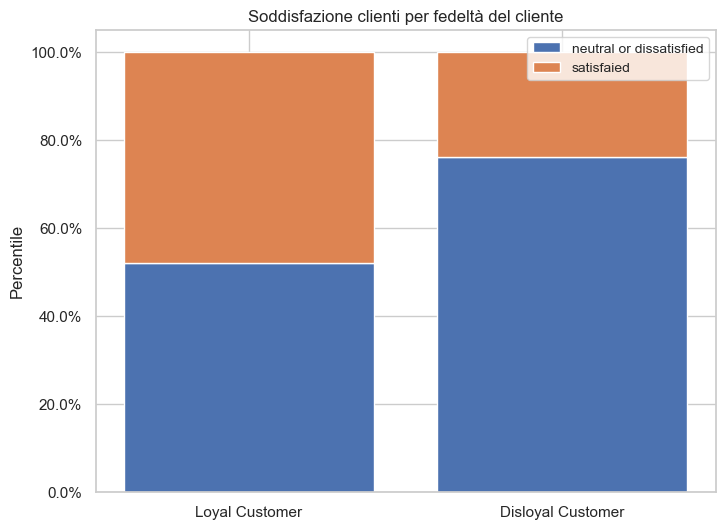

In [30]:
loy_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Customer Type']=='Loyal Customer')])*100/len(df[(df['Customer Type']=='Loyal Customer')])
loy_sat=len(df[(df['satisfaction']=='satisfied')&(df['Customer Type']=='Loyal Customer')])*100/len(df[(df['Customer Type']=='Loyal Customer')])
disl_disat=len(df[(df['satisfaction']=='neutral or dissatisfied')&(df['Customer Type']=='Disloyal Customer')])*100/len(df[(df['Customer Type']=='Disloyal Customer')])
disl_sat=len(df[(df['satisfaction']=='satisfied')&(df['Customer Type']=='Disloyal Customer')])*100/len(df[(df['Customer Type']=='Disloyal Customer')])
sat=[round(loy_sat,0),round(disl_sat,0)]
disat=[round(loy_disat,0),round(disl_disat,0)]
fig, ax = plt.subplots(figsize=(8, 6))
barra1=ax.bar(df['Customer Type'].unique(), disat, label='neutral or dissatisfied')
barra2=ax.bar(df['Customer Type'].unique(), sat, bottom=disat, label='satisfaied')

ax.set_ylabel('Percentile')
ax.set_title('Soddisfazione clienti per fedeltà del cliente')
ax.legend(loc="upper right",fontsize='small')
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.show()

In [31]:
df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

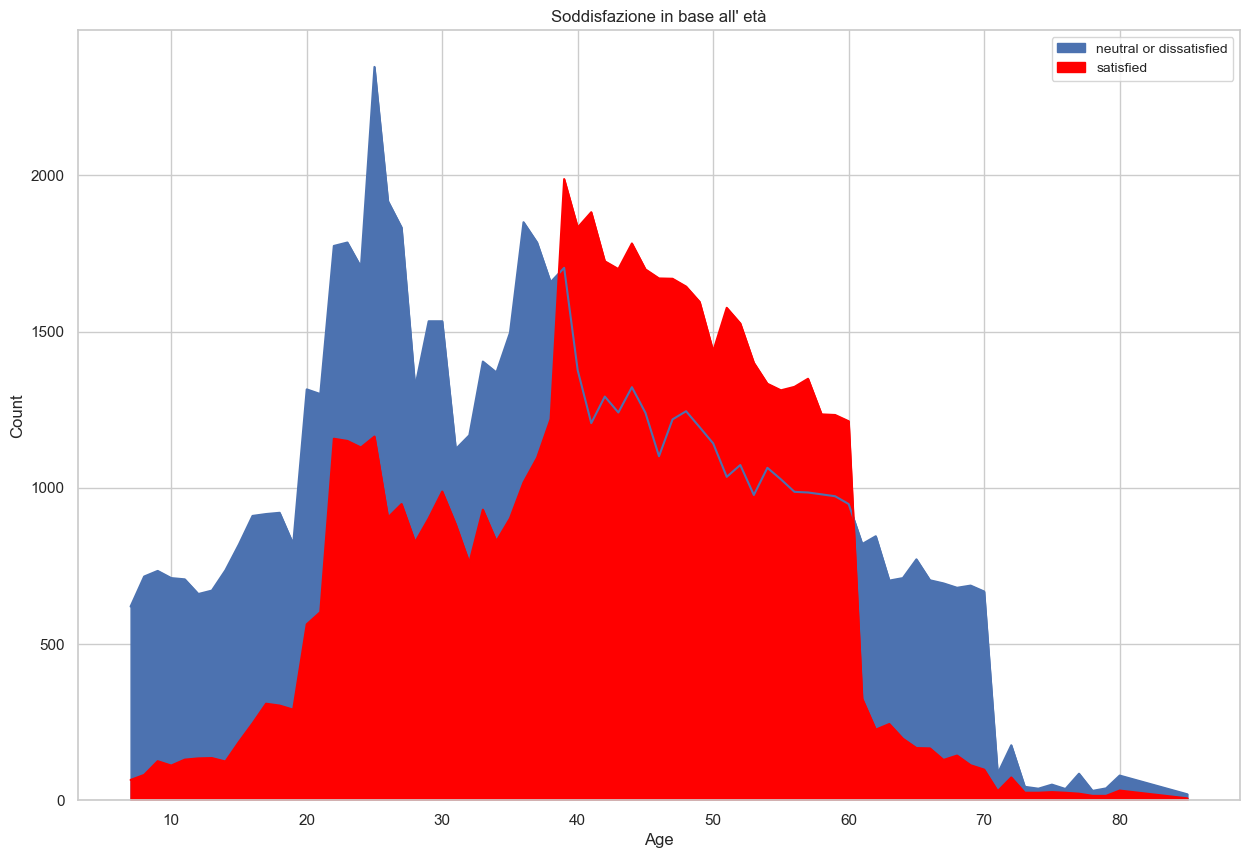

In [32]:
plt.figure(figsize=(15,10))
df[df['satisfaction']=='neutral or dissatisfied'].groupby(by='Age').satisfaction.count().plot(kind='area',label='neutral or dissatisfied')
df[df['satisfaction']=='satisfied'].groupby(by='Age').satisfaction.count().plot(kind='area',label='satisfied',color='red')
plt.ylabel('Count')
plt.title("Soddisfazione in base all' età")
plt.legend(loc="upper right",fontsize='small')

In [33]:
df[(df['Age']>18)&(df['Age']<32)].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.000000,31817.0
mean,64148.355313,25.253261,1060.534337,2.706603,2.866675,2.743376,2.974039,3.203665,2.920923,3.166798,3.211742,3.245812,3.207813,3.675237,3.234560,3.687651,3.216237,14.895402,15.385769
std,37067.867168,3.381360,865.838820,1.347920,1.630815,1.414743,1.234975,1.361933,1.408301,1.378010,1.358955,1.279130,1.317280,1.110237,1.279449,1.120784,1.359693,37.734863,38.351541
min,11.000000,19.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,31626.000000,23.000000,441.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.0
50%,63100.000000,25.000000,788.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.0
75%,96146.000000,28.000000,1399.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.0
max,129880.000000,31.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,978.000000,970.0


In [34]:
df[(df['Age']>38)&(df['Age']<60)].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.000000,57294.0
mean,66331.324100,48.204472,1365.763919,2.796663,3.075348,2.825357,2.982686,3.266014,3.611111,3.717981,3.548103,3.545450,3.523912,3.661308,3.409292,3.666824,3.418176,14.514679,14.882448
std,37621.913504,6.038863,1086.091176,1.368023,1.482128,1.424032,1.328643,1.291700,1.234954,1.213834,1.278541,1.263851,1.286664,1.205288,1.236690,1.197197,1.253483,38.096252,38.481632
min,1.000000,39.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,34029.000000,43.000000,447.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.0
50%,67975.500000,48.000000,979.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.0
75%,98607.750000,53.000000,2149.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.0
max,129879.000000,59.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.0


In [35]:
partenze=[]
arrivi=[]
recensione=[]
distanze=(500,1000,2000,3000)

partenze.append(df[df['Flight Distance']<414]['Departure Delay in Minutes'].mean())
arrivi.append(df[df['Flight Distance']<414]['Arrival Delay in Minutes'].mean())
recensione.append(df[df['Flight Distance']<414]['Departure/Arrival time convenient'].mean())
partenze.append(df[(df['Flight Distance']<844)&(df['Flight Distance']>=414)]['Departure Delay in Minutes'].mean())
arrivi.append(df[(df['Flight Distance']<844)&(df['Flight Distance']>=414)]['Arrival Delay in Minutes'].mean())
recensione.append(df[(df['Flight Distance']<844)&(df['Flight Distance']>=414)]['Departure/Arrival time convenient'].mean())
partenze.append(df[(df['Flight Distance']<1744)&(df['Flight Distance']>=844)]['Departure Delay in Minutes'].mean())
arrivi.append(df[(df['Flight Distance']<1744)&(df['Flight Distance']>=844)]['Arrival Delay in Minutes'].mean())
recensione.append(df[(df['Flight Distance']<1744)&(df['Flight Distance']>=844)]['Departure/Arrival time convenient'].mean())
partenze.append(df[(df['Flight Distance']<5000)&(df['Flight Distance']>=1744)]['Departure Delay in Minutes'].mean())
arrivi.append(df[(df['Flight Distance']<5000)&(df['Flight Distance']>=1744)]['Arrival Delay in Minutes'].mean()) 
recensione.append(df[(df['Flight Distance']<5000)&(df['Flight Distance']>=1744)]['Departure/Arrival time convenient'].mean()) 

distance_delay=pd.DataFrame({
    'Flight Distance':(414,844,1744,5000),
    'Departure Delay in Minutes':partenze,
    'Arrival Delay in Minutes':arrivi,
    'Departure/Arrival time convenient':recensione
})
distance_delay['Departure Delay in Minutes']=distance_delay['Departure Delay in Minutes'].astype('int64')
distance_delay['Arrival Delay in Minutes']=distance_delay['Arrival Delay in Minutes'].astype('int64')
distance_delay['Departure/Arrival time convenient']=distance_delay['Departure/Arrival time convenient'].round(1)
distance_delay

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient
0,414,13,14,3.0
1,844,15,16,3.1
2,1744,15,15,3.2
3,5000,14,14,3.0


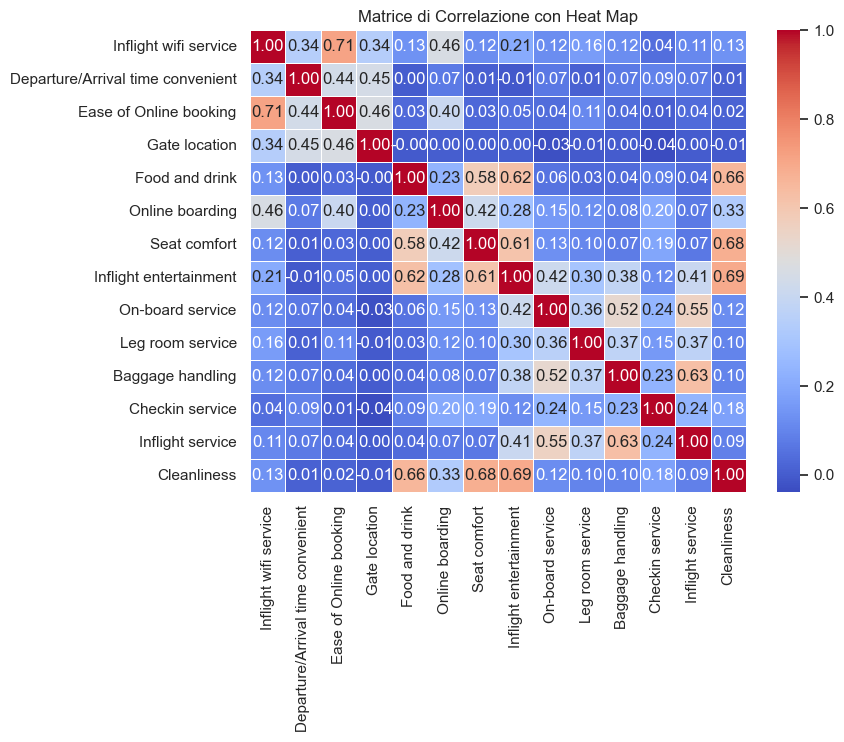

In [36]:
correlation_matrix = df.iloc[:,7:21].corr()
correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione con Heat Map')
plt.show()

In [37]:
import pandas as pd
from collections import Counter
colonne_di_interesse = df.columns[7:21]
#dizionario per contare i conteggi dei valori da 0 a 5 nelle colonne
conteggi_totali = {i: 0 for i in range(6)}  # Inizializza tutti i conteggi a zero

for colonna in colonne_di_interesse:
    counter = Counter(df[colonna])  # Conta i valori nella colonna corrente
    for voto, conteggio in counter.items():
        conteggi_totali[voto] += conteggio  # Aggiunge i conteggi al dizionario

print(conteggi_totali)


{0: 20134, 1: 224118, 2: 305791, 3: 393653, 4: 496118, 5: 378506}


In [38]:
valutazioni=pd.DataFrame(conteggi_totali.items(), columns=['Voto', 'Conteggio'])
valutazioni

,Voto,Conteggio
0,0,20134
1,1,224118
2,2,305791
3,3,393653
4,4,496118
5,5,378506
